In [1]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [2]:
import re
import string
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")

# Any results you write to the current directory are saved as output

In [3]:
#import the necessary libraries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('reviews_data.csv')

In [5]:
data.shape

(850, 6)

Removing Missing Values

In [6]:
# remove missing values
data = data.dropna().reset_index(drop=True)

In [7]:
data

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...
...,...,...,...,...,...,...
700,Margaret,"Cotati, CA","Reviewed Oct. 2, 2011",1.0,I ordered Via Starbucks coffee online. I recei...,['No Images']
701,Ric,"Oakville, ON","Reviewed Aug. 31, 2011",3.0,"My name is Ric **, I am journalist by professi...",['No Images']
702,Jayne,"Ny, NY","Reviewed Aug. 24, 2011",1.0,"The bagel was ice cold, not cut and not toasted.",['No Images']
703,Norma,"La Puente, CA","Reviewed Aug. 15, 2011",1.0,"In the morning of Monday, August 15, 2011, at ...",['No Images']


In [8]:
# Download NLTK resources (stopwords and punkt tokenizer)
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Preprocessing

In [9]:
# Function to clean and preprocess a single tweet
def clean_and_preprocess(coffee):
    # Convert to lowercase
    coffee = coffee.lower()

    # Remove URLs
    coffee = re.sub(r'http\S+|www\S+|https\S+', '', coffee, flags=re.MULTILINE)

    # Remove mentions
    #tweet = re.sub(r'@\w+', '', tweet)

    # Remove special characters and numbers
    coffee = re.sub(r'[^a-zA-Z\s]', '', coffee)

    # Tokenize the tweet
    words = word_tokenize(coffee)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Join the words back into a single string
    cleaned_coffee = ' '.join(words)

    return cleaned_coffee

# Apply the cleaning function to each tweet in the 'text' column
data['cleaned_Review'] = data['Review'].apply(clean_and_preprocess)

# Display the cleaned dataset
print("\nCleaned Dataset:")
print(data[ 'cleaned_Review'].head())


Cleaned Dataset:
0    amber ladonna starbucks southwest parkway alwa...
1    starbucks fire station altamonte springs fl ma...
2    wanted go way recognize starbucks employee bil...
3    friend starbucks card didnt work thankful work...
4    im kick drinking cups warm water work instacar...
Name: cleaned_Review, dtype: object


In [10]:
data.head(10)

,name,location,Date,Rating,Review,Image_Links,cleaned_Review
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images'],amber ladonna starbucks southwest parkway alwa...
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images'],starbucks fire station altamonte springs fl ma...
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...,wanted go way recognize starbucks employee bil...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images'],friend starbucks card didnt work thankful work...
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...,im kick drinking cups warm water work instacar...
5,Alyssa,"Sunnyvale, TX","Reviewed Sept. 14, 2023",1.0,We had to correct them on our order 3 times. T...,['No Images'],correct order times never got right manager ca...
6,ken,"Spring Hill, FL","Reviewed Sept. 8, 2023",1.0,I have tried Starbucks several different times...,['No Images'],tried starbucks several different times differ...
7,Nikki,"Asheville, NC","Reviewed Aug. 25, 2023",1.0,Starbucks near me just launched new fall foods...,['No Images'],starbucks near launched new fall foods beverag...
8,Alex,"Reisterstown, MD","Reviewed Aug. 5, 2023",1.0,"I ordered online for the Reisterstown Rd, St T...",['No Images'],ordered online reisterstown rd st thomas sc ga...
9,Sunny,"Zionville, Other","Reviewed Aug. 4, 2023",1.0,Staff at the Smythe St. Superstore location in...,['No Images'],staff smythe st superstore location fredericto...


Sentimental Analysis

In [11]:
#Create an instance of the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

#Define a function to perform sentiment analysis using VADER
def get_sentiment(coffee):
    Rating = analyzer.polarity_scores(coffee)
    compound_score = Rating['compound']
    return compound_score

# Apply the function to the 'tokens' column of the DataFrame
data['SentimentVADER'] = data['cleaned_Review'].apply(get_sentiment)

# Print the DataFrame with sentiment scores
print(data['SentimentVADER'])

0      0.8779
1      0.9670
2      0.4215
3      0.9028
4      0.9714
        ...  
700   -0.1779
701   -0.2960
702   -0.2732
703    0.0000
704    0.8957
Name: SentimentVADER, Length: 705, dtype: float64


In [12]:
data.head(10)

,name,location,Date,Rating,Review,Image_Links,cleaned_Review,SentimentVADER
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images'],amber ladonna starbucks southwest parkway alwa...,0.8779
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images'],starbucks fire station altamonte springs fl ma...,0.9670
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...,wanted go way recognize starbucks employee bil...,0.4215
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images'],friend starbucks card didnt work thankful work...,0.9028
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...,im kick drinking cups warm water work instacar...,0.9714
5,Alyssa,"Sunnyvale, TX","Reviewed Sept. 14, 2023",1.0,We had to correct them on our order 3 times. T...,['No Images'],correct order times never got right manager ca...,-0.8316
6,ken,"Spring Hill, FL","Reviewed Sept. 8, 2023",1.0,I have tried Starbucks several different times...,['No Images'],tried starbucks several different times differ...,0.0000
7,Nikki,"Asheville, NC","Reviewed Aug. 25, 2023",1.0,Starbucks near me just launched new fall foods...,['No Images'],starbucks near launched new fall foods beverag...,0.8885
8,Alex,"Reisterstown, MD","Reviewed Aug. 5, 2023",1.0,"I ordered online for the Reisterstown Rd, St T...",['No Images'],ordered online reisterstown rd st thomas sc ga...,-0.8316
9,Sunny,"Zionville, Other","Reviewed Aug. 4, 2023",1.0,Staff at the Smythe St. Superstore location in...,['No Images'],staff smythe st superstore location fredericto...,-0.7655


In [13]:
temp = data.groupby('Rating').count()['Review'].reset_index().sort_values(by='Review',ascending=False)
temp.style.background_gradient(cmap='Purples')

,Rating,Review
0,1.000000,451
1,2.000000,99
4,5.000000,83
3,4.000000,39
2,3.000000,33


<Axes: xlabel='Rating', ylabel='count'>

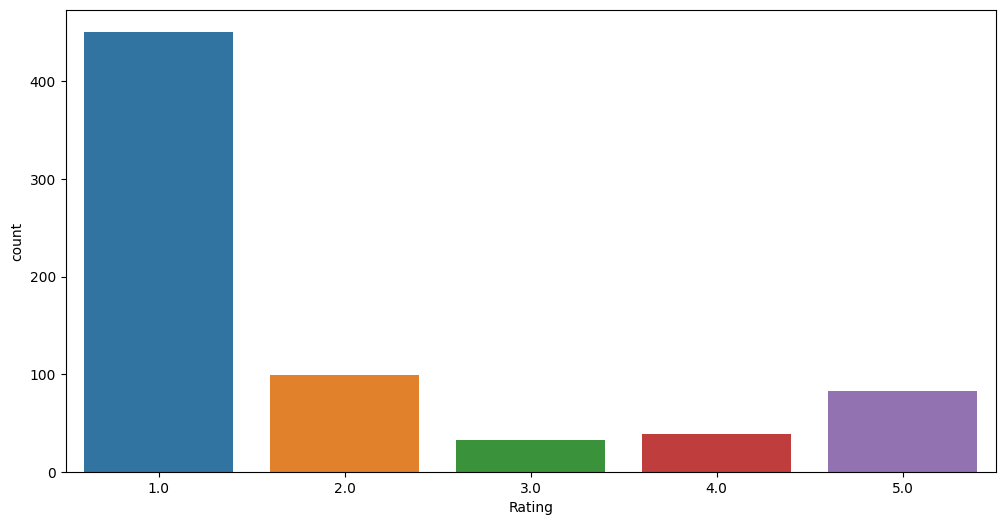

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(x='Rating',data=data)

In [15]:
fig = go.Figure(go.Funnelarea(
    text =temp.Rating,
    values = temp.Review,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Rating Distribution"}
    ))
fig.show()

In [16]:
# Define a function to categorize sentiment based on VADER score
def categorize_sentiment(score):
    if score < 0:
        return 'negative'
    elif score > 0:
        return 'positive'
    else:
        return 'neutral'

# Apply the function to create the 'SentimentCategory' column
data['SentimentCategory'] = data['SentimentVADER'].apply(categorize_sentiment)

In [17]:
data.head(10)

,name,location,Date,Rating,Review,Image_Links,cleaned_Review,SentimentVADER,SentimentCategory
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images'],amber ladonna starbucks southwest parkway alwa...,0.8779,positive
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images'],starbucks fire station altamonte springs fl ma...,0.9670,positive
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...,wanted go way recognize starbucks employee bil...,0.4215,positive
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images'],friend starbucks card didnt work thankful work...,0.9028,positive
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...,im kick drinking cups warm water work instacar...,0.9714,positive
5,Alyssa,"Sunnyvale, TX","Reviewed Sept. 14, 2023",1.0,We had to correct them on our order 3 times. T...,['No Images'],correct order times never got right manager ca...,-0.8316,negative
6,ken,"Spring Hill, FL","Reviewed Sept. 8, 2023",1.0,I have tried Starbucks several different times...,['No Images'],tried starbucks several different times differ...,0.0000,neutral
7,Nikki,"Asheville, NC","Reviewed Aug. 25, 2023",1.0,Starbucks near me just launched new fall foods...,['No Images'],starbucks near launched new fall foods beverag...,0.8885,positive
8,Alex,"Reisterstown, MD","Reviewed Aug. 5, 2023",1.0,"I ordered online for the Reisterstown Rd, St T...",['No Images'],ordered online reisterstown rd st thomas sc ga...,-0.8316,negative
9,Sunny,"Zionville, Other","Reviewed Aug. 4, 2023",1.0,Staff at the Smythe St. Superstore location in...,['No Images'],staff smythe st superstore location fredericto...,-0.7655,negative


Topic Modeling


In [18]:
import os
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
import gensim
from gensim import corpora, models, similarities
import logging
import tempfile
from nltk.corpus import stopwords
from string import punctuation
from collections import OrderedDict
import seaborn as sns
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

init_notebook_mode(connected=True) #do not miss this line

import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 17.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicor

In [19]:
datafile = 'reviews_data.csv'

In [20]:
coffees = pd.read_csv(datafile, encoding='latin1')
print("Number of Reviews: ",len(coffees['Review']))
coffees.head(5)

Number of Reviews:  850


,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,Iâm on this kick of drinking 5 cups of warm ...,['https://media.consumeraffairs.com/files/cach...


In [21]:
corpus=[]
a=[]
for i in range(len(coffees['Review'])):
        a=coffees['Review'][i]
        corpus.append(a)

corpus[0:10]

['Amber and LaDonna at the Starbucks on Southwest Parkway are always so warm and welcoming. There is always a smile in their voice when they greet you at the drive-thru. And their customer service is always spot-on, they always get my order right and with a smile. I would actually give them more than 5 stars if they were available.',
 '** at the Starbucks by the fire station on 436 in Altamonte Springs, FL made my day and finally helped me figure out the way to make my drink so Iâ\x80\x99d love it. She took time out to talk to me for 2 minutes to make my experience better than what Iâ\x80\x99m used to. It was much appreciated! Iâ\x80\x99ve had bad experiences one after another at the Starbucks thatâ\x80\x99s closest to me in my work building with my drinks not being great along with not great customer service from specific baristas. Niko was refreshing to speak to and pleasant. The drink was perfect! Store 11956',
 'I just wanted to go out of my way to recognize a Starbucks employee Bi

In [22]:
coffees.head(5)

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,Iâm on this kick of drinking 5 cups of warm ...,['https://media.consumeraffairs.com/files/cach...


In [23]:
TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Folder "/tmp" will be used to save temporary dictionary and corpus.


In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
# removing common words and tokenizing
list1 = ['**']
stoplist = stopwords.words('english') + list(punctuation) + list1

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]

dictionary = corpora.Dictionary(texts)
dictionary.save(os.path.join(TEMP_FOLDER, 'sb.dict'))  # store the dictionary, for future reference

#print(dictionary)
#print(dictionary.token2id)

In [55]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'sb.mm'), corpus)  # store to disk, for later use

In [27]:
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model

In [28]:
corpus_tfidf = tfidf[corpus]  # step 2 -- use the model to transform vectors

In [29]:
total_topics = 5

In [30]:
lda = gensim.models.LdaMulticore(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

Shows the most important topic number

In [36]:
#Show first n important word in the topics:
lda.show_topics(total_topics,5)

[(0,
  '0.021*"starbucks" + 0.013*"coffee" + 0.008*"get" + 0.007*"go" + 0.006*"customer"'),
 (1,
  '0.019*"starbucks" + 0.010*"coffee" + 0.006*"get" + 0.005*"one" + 0.005*"customer"'),
 (2,
  '0.024*"starbucks" + 0.006*"coffee" + 0.006*"one" + 0.006*"would" + 0.006*"drink"'),
 (3,
  '0.011*"starbucks" + 0.008*"coffee" + 0.008*"store" + 0.006*"go" + 0.006*"get"'),
 (4,
  '0.013*"starbucks" + 0.008*"coffee" + 0.006*"get" + 0.006*"customer" + 0.005*"went"')]

The top topic that were talked about here are Starbucks and Coffee.
With the unique value we had, they are probably talking about the starbucks's customer card, the time they get coffee (usually morning), the quantity of drinks they usually order it at the store (which is once) and also the customers' services that they get

In [32]:
data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}
#data_lda

In [33]:
df_lda = pd.DataFrame(data_lda)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(5, 41)


In [34]:
df_lda

,starbucks,coffee,get,go,customer,like,one,always,drink,time,...,good,every,review,manager,money,text,people,make,way,i'm
0,0.020601,0.013028,0.008304,0.007223,0.005951,0.005630,0.005586,0.004758,0.004129,0.004087,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1,0.018842,0.010049,0.005583,0.003766,0.005180,0.004902,0.005391,0.002592,0.000000,0.002979,...,0.002845,0.002423,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2,0.024005,0.006175,0.002723,0.000000,0.005547,0.004479,0.006077,0.002500,0.005871,0.003732,...,0.000000,0.000000,0.00285,0.002812,0.002727,0.002666,0.000000,0.00000,0.000000,0.000000
3,0.011100,0.008348,0.005806,0.005815,0.003126,0.004067,0.003851,0.003185,0.002828,0.003730,...,0.000000,0.002440,0.00000,0.002899,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
4,0.012586,0.008189,0.006199,0.002628,0.006036,0.002920,0.004359,0.000000,0.004337,0.004027,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.002756,0.00249,0.002472,0.002434


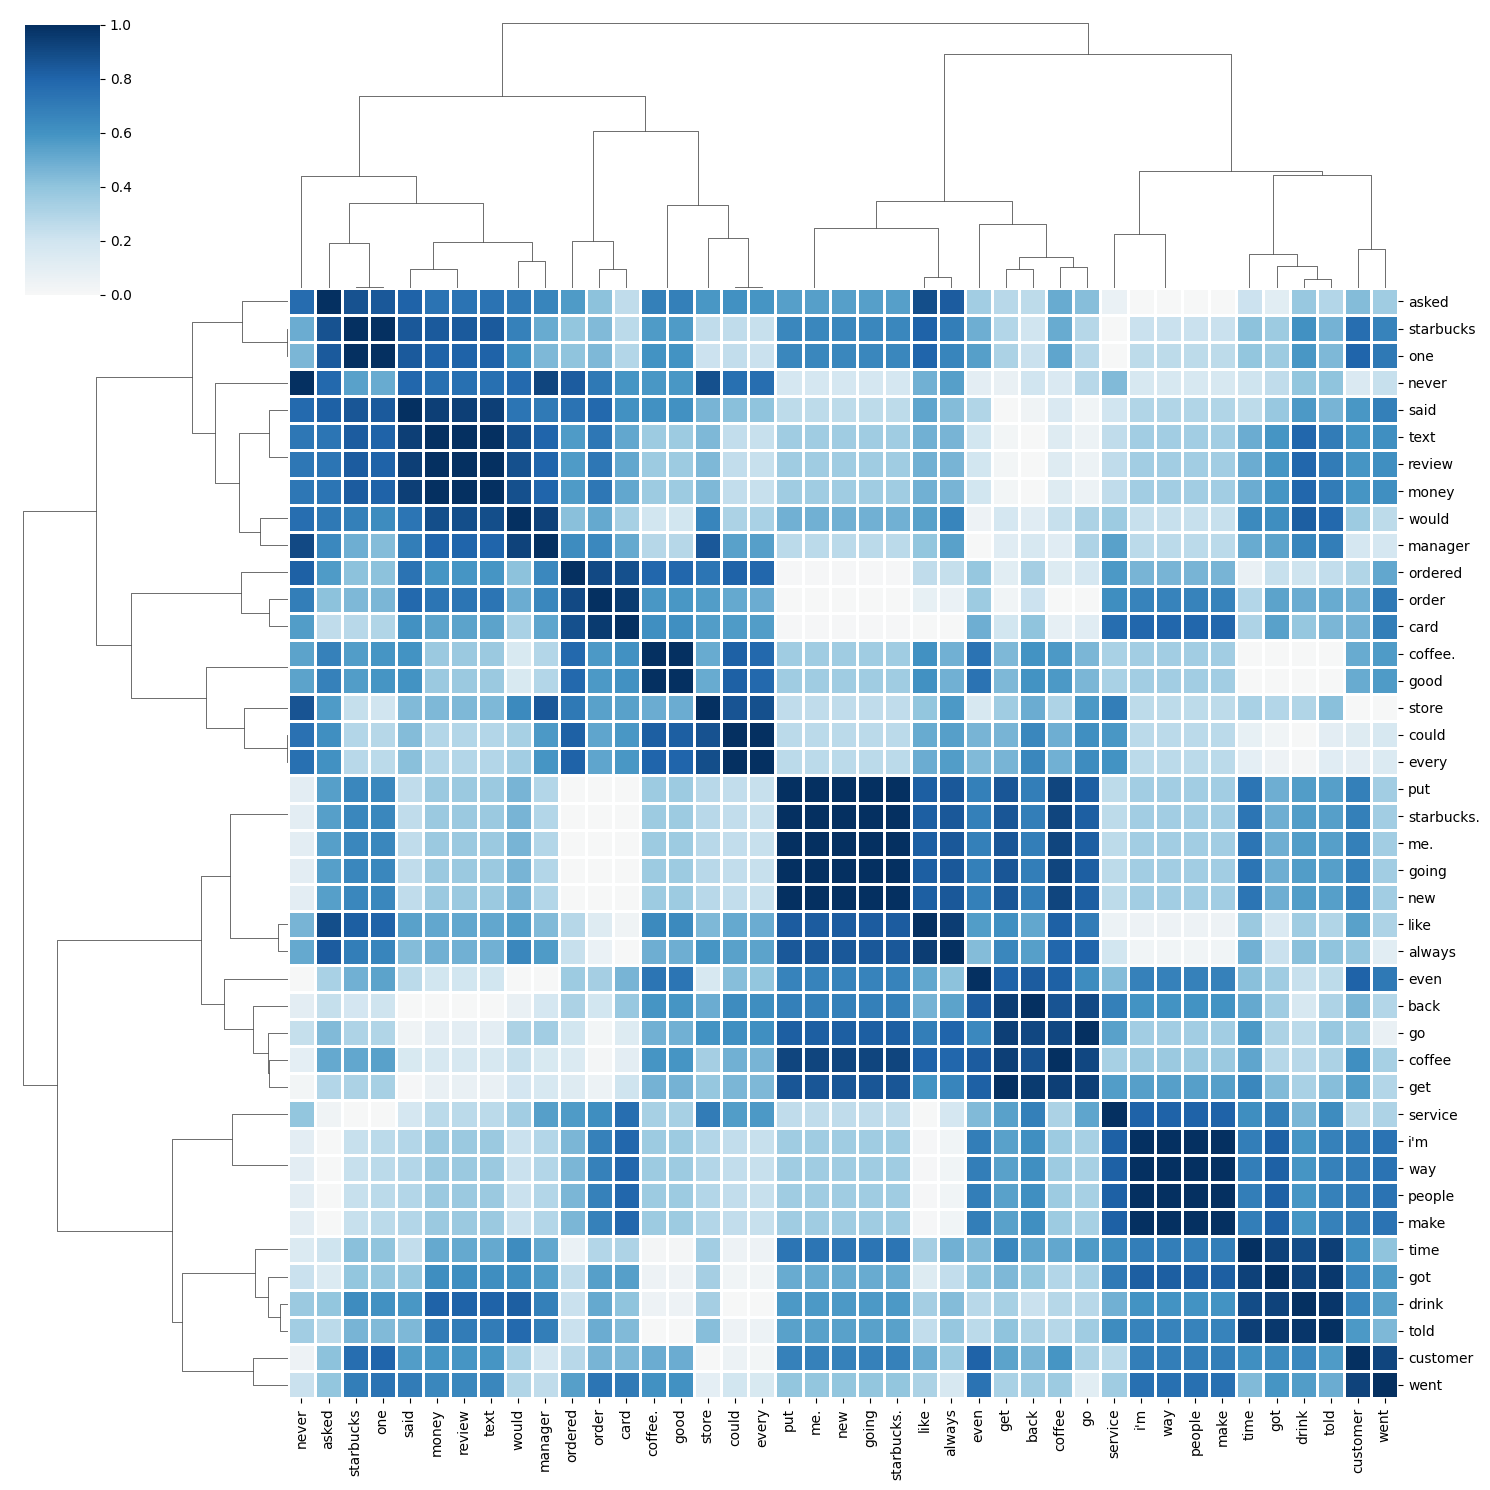

In [35]:
g=sns.clustermap(df_lda.corr(), center=0, standard_scale=1, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(15, 15))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()
#plt.setp(ax_heatmap.get_yticklabels(), rotation=0)  # For y axis

Named Entity Recognition

In [37]:
#libraries
import pandas as pd
import spacy
from spacy import displacy
import en_core_web_sm
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import re
import string
import numpy as np
import random
import pandas as pd
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")

In [38]:
# Loading spaCy's pre-trained model
nlp = en_core_web_sm.load()

# Loading the airline reviews dataset
df = pd.read_csv('reviews_data.csv')

In [39]:
df.head(5)

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


In [41]:
# Function to clean and preprocess a single tweet
def clean_and_preprocess(coffee):

    # Remove URLs
    coffee = re.sub(r'http\S+|www\S+|https\S+', '', coffee, flags=re.MULTILINE)

    # Remove mentions
    coffee = re.sub(r'@\w+', '', coffee)

    # Remove special characters and numbers
    coffee = re.sub(r'[^a-zA-Z\s]', '', coffee)

    return coffee

# Apply the cleaning function to each tweet in the 'text' column
df['cleaned_review'] = df['Review'].apply(clean_and_preprocess)

# Display the cleaned dataset
print("\nCleaned Dataset:")
print(df[ 'cleaned_review'].head())


Cleaned Dataset:
0    Amber and LaDonna at the Starbucks on Southwes...
1     at the Starbucks by the fire station on  in A...
2    I just wanted to go out of my way to recognize...
3    Me and my friend were at Starbucks and my card...
4    Im on this kick of drinking  cups of warm wate...
Name: cleaned_review, dtype: object


In [42]:
df.head(5)

,name,location,Date,Rating,Review,Image_Links,cleaned_review
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images'],Amber and LaDonna at the Starbucks on Southwes...
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images'],at the Starbucks by the fire station on in A...
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...,I just wanted to go out of my way to recognize...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images'],Me and my friend were at Starbucks and my card...
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...,Im on this kick of drinking cups of warm wate...


In [46]:
# Processing each review and extracting named entities
for i in range(0, 20):
    review = df['cleaned_review'][i]

# Process the review using spaCy NLP pipeline
    doc = nlp(review)

# Manually correct 'Store' to 'FAC'
    for token in doc:
        if token.text == 'Store':
            token.ent_type_ = 'FAC'

# Manually correct 'SOO' to 'RB'
    for token in doc:
        if token.text == 'SOO':
            token.ent_type_ = 'RB'

# Manually correct 'Dillon' to 'PERSON'
    for token in doc:
        if token.text == 'Dillon':
            token.ent_type_ = 'PERSON'

# Print entities and their labels
    print(f"Review #{i + 1}: {review}")
    for ent in doc.ents:
        print(f"Entity: {ent.text} - Label: {ent.label_}")

    print('\n')


Review #1: Amber and LaDonna at the Starbucks on Southwest Parkway are always so warm and welcoming There is always a smile in their voice when they greet you at the drivethru And their customer service is always spoton they always get my order right and with a smile I would actually give them more than  stars if they were available
Entity: LaDonna - Label: PERSON
Entity: Starbucks - Label: ORG


Review #2:  at the Starbucks by the fire station on  in Altamonte Springs FL made my day and finally helped me figure out the way to make my drink so Id love it She took time out to talk to me for  minutes to make my experience better than what Im used to It was much appreciated Ive had bad experiences one after another at the Starbucks thats closest to me in my work building with my drinks not being great along with not great customer service from specific baristas Niko was refreshing to speak to and pleasant The drink was perfect Store 
Entity: Starbucks - Label: ORG
Entity: Altamonte Spring

In [54]:
from collections import Counter
# Initializing a Counter to keep track of entity frequencies
entity_counter = Counter()

# Processing each review and extract named entities
for i in range(0,850):
    review = df['Review'][i]
    doc = nlp(review)

    # Counting the frequency of each named entity
    for ent in doc.ents:
        entity_counter[ent.text] += 1

# Printing the most common named entities and their frequencies
print("Top 10 Most Common Named Entities:")
for entity, freq in entity_counter.most_common(10):
    print(f"Entity: {entity} - Frequency: {freq}")

Top 10 Most Common Named Entities:
Entity: Starbucks - Frequency: 895
Entity: one - Frequency: 86
Entity: two - Frequency: 71
Entity: first - Frequency: 63
Entity: 2 - Frequency: 49
Entity: today - Frequency: 45
Entity: 3 - Frequency: 38
Entity: Today - Frequency: 23
Entity: One - Frequency: 21
Entity: years - Frequency: 21
